<center>
<img src="https://quantumrickusach.notion.site/image/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2Fcabb6d21-467a-4eab-beff-81a08cc5ecdb%2F0592fbd9-722d-4175-9604-eae98bf718b1%2FCaptura_de_pantalla_2024-08-14_a_la(s)_5.30.50_a._m..png?table=block&id=305d81b1-7009-41ae-a80b-8a8e20a4f9c1&spaceId=cabb6d21-467a-4eab-beff-81a08cc5ecdb&width=2000&userId=&cache=v2">

# QuSantiago III

 Dictado por: Ricardo Quispe

# <center> Qiskit: Oscilaciones de Rabi con ruido y Decoherecnia


<center>
<img src=https://img.freepik.com/free-vector/neon-light-background-with-waves_23-2148899318.jpg>

Consideramos un sistema de qubits que interactúa con un campo externo. Este tipo de Hamiltoniano es común en la dinámica de qubits y la resonancia magnética cuántica. Vamos a desglosar el proceso paso a paso.

### 1. Contexto Físico

Supongamos que estamos considerando un sistema de un solo qubit en presencia de un campo magnético externo. El Hamiltoniano de un qubit en un campo magnético puede ser descrito por:

$ H = \frac{1}{2} \boldsymbol{\sigma} \cdot \mathbf{B}(t) $

donde $\boldsymbol{\sigma}$ es el vector de matrices de Pauli $(\sigma_x, \sigma_y, \sigma_z)$ y $\mathbf{B}(t)$ es el campo magnético que puede depender del tiempo.

### 2. Campo Magnético

Para derivar el Hamiltoniano proporcionado, consideramos un campo magnético que tiene componentes en las direcciones $x$ y $z$. Podemos escribir:

$ \mathbf{B}(t) = (B_x \cos(\omega t), 0, B_z) $

donde:
- $B_z$ es la componente estática del campo en la dirección $z$.
- $B_x \cos(\omega t)$ es la componente oscilante del campo en la dirección $x$, con frecuencia $\omega$.

### 3. Hamiltoniano de un Qubit en un Campo Magnético

Sustituyendo $\mathbf{B}(t)$ en el Hamiltoniano del qubit, obtenemos:

$ H = \frac{1}{2} (\sigma_x B_x \cos(\omega t) + \sigma_z B_z) $

### 4. Frecuencias en el Hamiltoniano

Podemos reescribir los términos utilizando las frecuencias $\nu_x$ y $\nu_z$ donde:

$ \nu_x = \frac{B_x}{2\pi} $
$ \nu_z = \frac{B_z}{2\pi} $
$ \nu_d = \frac{\omega}{2\pi} $

El Hamiltoniano ahora se puede expresar como:

$ H = \frac{1}{2} (2\pi \nu_x \cos(2\pi \nu_d t) \sigma_x + 2\pi \nu_z \sigma_z) $

### 5. Matrices de Pauli

Utilizando las matrices de Pauli $\sigma_x = X$ y $\sigma_z = Z$, podemos escribir el Hamiltoniano en términos de $X$ y $Z$:

$ H = \frac{1}{2} \left( 2\pi \nu_x \cos(2\pi \nu_d t) X + 2\pi \nu_z Z \right) $

### 6. Forma Final del Hamiltoniano

Simplificando, obtenemos:

$ H = \frac{1}{2} \times 2\pi \nu_z Z + 2\pi \nu_x \cos(2\pi \nu_d t) X $

### Descripción

- El Hamiltoniano describe un sistema de un solo qubit en un campo magnético externo con componentes estáticas y oscilantes.
- La componente estática en la dirección $z$ se representa por $2\pi \nu_z Z$.
- La componente oscilante en la dirección $x$ se representa por $2\pi \nu_x \cos(2\pi \nu_d t) X$.
- Las frecuencias $\nu_x$ y $\nu_z$ están relacionadas con las amplitudes del campo magnético en las direcciones $x$ y $z$, respectivamente.
- La frecuencia $\nu_d$ es la frecuencia de la oscilación del campo en la dirección $x$.

Este Hamiltoniano es común en la dinámica de qubits y en la resonancia magnética cuántica, donde se utiliza para describir la interacción de un qubit con un campo magnético externo que puede ser manipulado para controlar el estado del qubit.

## 1. Configurar el solver con el modelo hamiltoniano

Configurar el solucionador con el modelo hamiltoniano A continuación, estableceremos $\hbar = 1$ y arreglaremos algunas unidades de tiempo arbitrarias, con todos los parámetros de frecuencia escalados en consecuencia. A continuación, primero establecemos algunos valores para estos parámetros de frecuencia y luego configuramos la instancia de clase Solver que almacena y manipula el modelo a resolver, utilizando matrices e instancias de Signal. Para el término independiente del tiempo, establecemos la señal en una constante, mientras que para el término de conducción transversal configuramos una señal armónica.

In [1]:
import numpy as np
from qiskit.quantum_info import Operator
from qiskit_dynamics import Solver, Signal


nu_z = 10.
nu_x = 1.
nu_d = 9.98 # Casi en resonancia con la diferencia de niveles de energía del Hamiltoniano, nu_z

X = Operator.from_label('X')
Y = Operator.from_label('Y')
Z = Operator.from_label('Z')
s_p = 0.5 * (X + 1j * Y)

solver = Solver(
    static_hamiltonian=.5 * 2 * np.pi * nu_z * Z,
    hamiltonian_operators=[2 * np.pi * nu_x * X],
)

## 2. Resolver el sistema
Ahora definimos el estado inicial de la simulación, el lapso de tiempo para simular y los tiempos intermedios para los que se solicita la solución, y resolvemos la evolución

In [2]:
from qiskit.quantum_info.states import Statevector
from qiskit.quantum_info import DensityMatrix

t_final = .5 / nu_x
tau = .005

y0 = Statevector([1., 0.])

n_steps = int(np.ceil(t_final / tau)) + 1
t_eval = np.linspace(0., t_final, n_steps)
signals = [Signal(envelope=1., carrier_freq=nu_d)]

sol = solver.solve(t_span=[0., t_final], y0=y0, signals=signals, t_eval=t_eval)

## Plotear el estado del Qubit

A continuación definimos una función local que calcula los valores esperados de Pauli del qubit en función del tiempo (que también define el vector de Bloch),

$\langle X(t)\rangle, \langle Y(t)\rangle, \langle Z(t)\rangle.$

La misma función grafica estas tres curvas y el vector de Bloch en el tiempo final, representado en 3D en la esfera de Bloch. Reutilizaremos esta función en la próxima sección.

Vemos que para los parámetros que hemos definido, el qubit ha completado casi exactamente una rotación de $\pi$ del vector de Bloch del qubit alrededor del eje $x$, desde el estado fundamental hasta el estado excitado (con muchas rotaciones intermedias de su componente transversal, cuya amplitud aumenta y disminuye). Este mecanismo de oscilaciones de Rabi es la base para las compuertas de un solo qubit utilizadas para manipular dispositivos cuánticos; en particular, esta es una realización de la compuerta $X$.

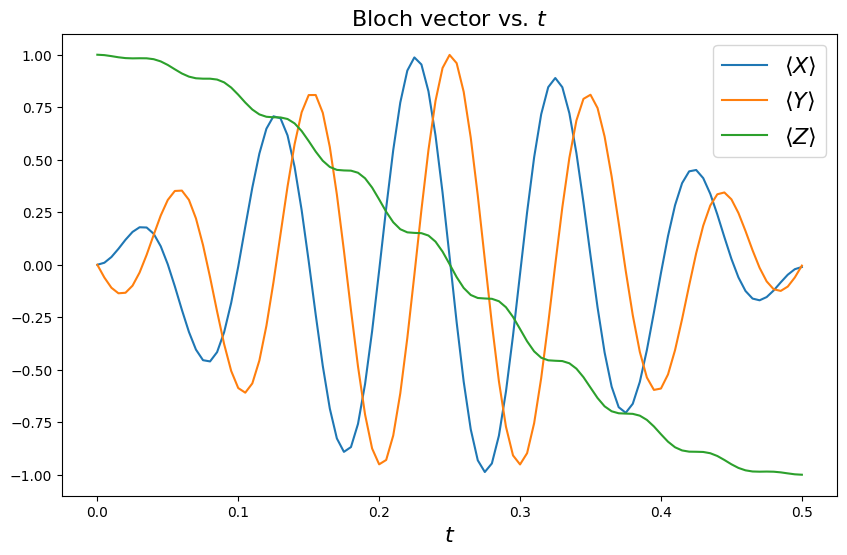

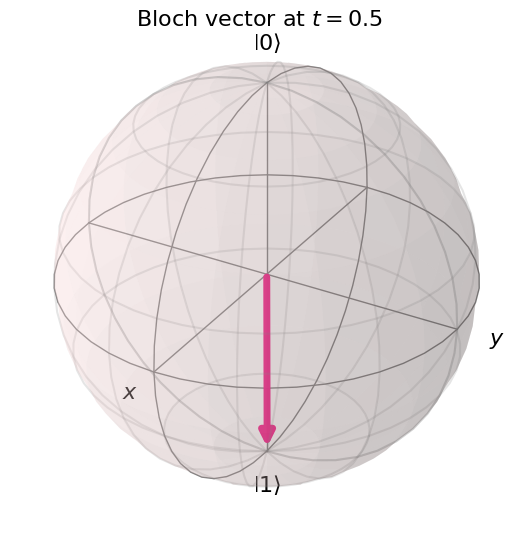

In [3]:
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
%matplotlib inline

fontsize = 16

def plot_qubit_dynamics(sol, t_eval, X, Y, Z):
    n_times = len(sol.y)
    x_data = np.zeros((n_times,))
    y_data = np.zeros((n_times,))
    z_data = np.zeros((n_times,))

    for t_i, sol_t in enumerate(sol.y):
        x_data[t_i] = sol_t.expectation_value(X).real
        y_data[t_i] = sol_t.expectation_value(Y).real
        z_data[t_i] = sol_t.expectation_value(Z).real

    _, ax = plt.subplots(figsize = (10, 6))
    plt.rcParams.update({'font.size': fontsize})
    plt.plot(t_eval, x_data, label = '$\\langle X \\rangle$')
    plt.plot(t_eval, y_data, label = '$\\langle Y \\rangle$')
    plt.plot(t_eval, z_data, label = '$\\langle Z \\rangle$')
    plt.legend(fontsize = fontsize)
    ax.set_xlabel('$t$', fontsize = fontsize)
    ax.set_title('Bloch vector vs. $t$', fontsize = fontsize)
    plt.show()

    display(plot_bloch_vector([x_data[-1], y_data[-1], z_data[-1]],
                              f'Bloch vector at $t = {t_eval[-1]}$'))

plot_qubit_dynamics(sol, t_eval, X, Y, Z)

### 4. Redefinir el modelo con damping y decoherencia

Ahora añadimos a nuestra simulación un entorno modelado como un baño sin memoria (Markoviano), resolviendo la ecuación maestra de Lindblad con el mismo Hamiltoniano que antes, pero considerando también términos de relajación y decoherencia de energía. Simulamos la dinámica hasta tiempos mayores que los tiempos de relajación típicos $T_1 = 1/\Gamma_1$ y $T_\phi = 1/\Gamma_2$. El estado del qubit debe describirse usando una matriz de densidad, evolucionando ahora de acuerdo con la ecuación maestra de Lindblad,

$ \partial_t \rho = -\frac{i}{\hbar} [H, \rho] + \mathcal{D}[\rho]. $

Tomamos el disipador de Lindblad para consistir en dos términos,

$ \mathcal{D}[\rho] = \mathcal{D}_1[\rho] + \mathcal{D}_2[\rho]. $

La acción de los términos de relajación de energía que describen la amortiguación en el entorno con tasa $\Gamma_1$ está generada por

$ \mathcal{D}_1[\rho] = \Gamma_1 \left( \sigma^+ \rho \sigma^- - \frac{1}{2} \{\sigma^- \sigma^+, \rho\} \right), $

con $\sigma^{\pm} = \frac{1}{2} (X \pm iY)$.

El segundo disipador describe la decoherencia (“pura”) con tasa $\Gamma_2$, y se lee

$ \mathcal{D}_2[\rho] = \Gamma_2 \left( Z \rho Z - \rho \right). $

Usamos la función definida arriba para calcular los componentes del vector de Bloch, lo cual se puede hacer en qiskit y en qiskit-dynamics, ya que la sintaxis de muchas funciones es idéntica tanto para vectores de estado como para matrices de densidad. La reducción del estado del qubit dentro de la esfera de Bloch debido a la evolución incoherente se puede ver claramente en los gráficos a continuación.


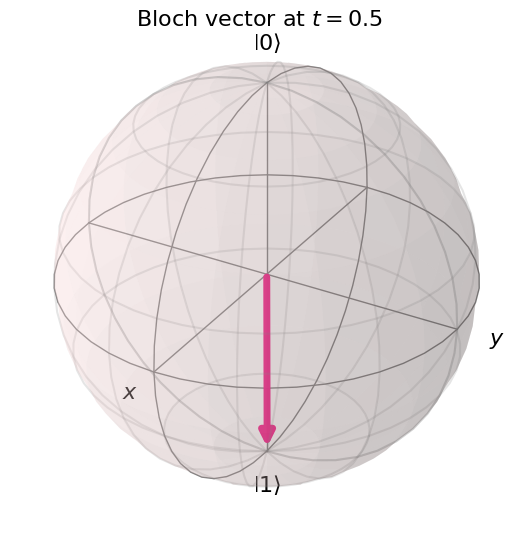

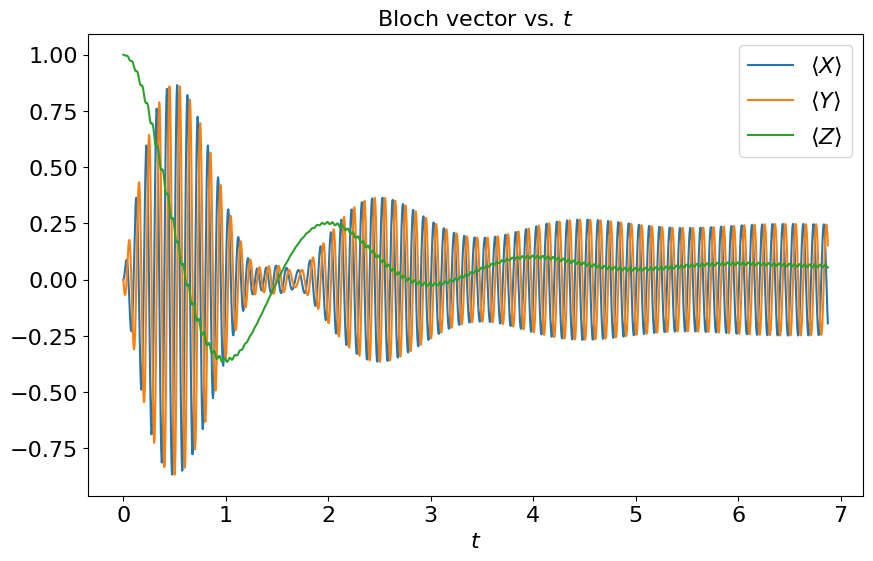

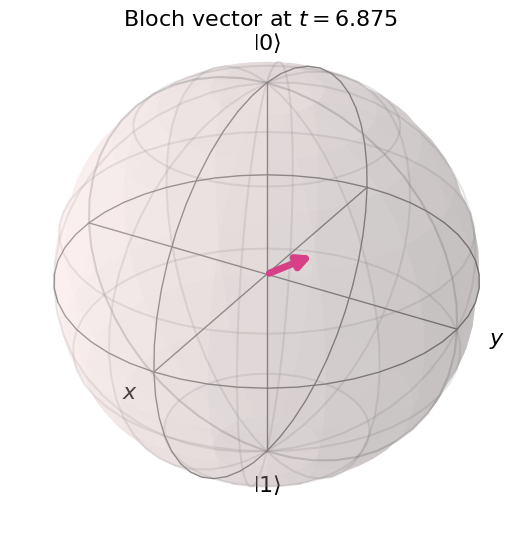

In [4]:
Gamma_1 = .8
Gamma_2 = .2

t_final = 5.5 / max(Gamma_1, Gamma_2)

y0 = DensityMatrix.from_label('0')
solver = Solver(
    static_hamiltonian=.5 * 2 * np.pi * nu_z * Z,
    hamiltonian_operators=[.5 * 2 * np.pi * nu_x * X],
    static_dissipators=[np.sqrt(Gamma_1) * s_p, np.sqrt(Gamma_2) * Z]
)

n_steps = int(np.ceil(t_final / tau)) + 1
t_eval = np.linspace(0., t_final, n_steps)
signals = [Signal(envelope=1., carrier_freq=nu_d)]

sol = solver.solve(t_span=[0., t_final], y0=y0, signals=signals, t_eval=t_eval)

plot_qubit_dynamics(sol, t_eval, X, Y, Z)

### Referencias:

- Qiskit Dynamics 0.5.1 documentation
- Rabi oscillations in a qubit coupled to a quantum two-level system (https://iopscience.iop.org/article/10.1088/1367-2630/8/6/103/pdf)